In [1]:
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import cmath
from tqdm import tqdm

In [3]:
#N = int(input("enter the no. of nodes : "))
N =10

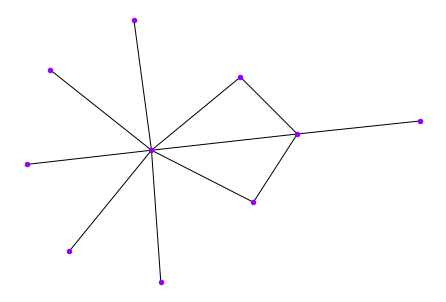

In [4]:
G = nx.scale_free_graph(N) #scale free directed network is created
G = G.to_undirected() # changed to undirected graph
nx.draw(G,node_color='#8F00FF', node_size=20) #to draw

In [5]:
p = nx.adjacency_matrix(G).toarray() #to find the matrix, 
print(p)

[[0 1 1 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [6]:
A = (p>=1).astype(int)
print(A)

[[0 1 1 1 1 1 0 1 1 1]
 [1 0 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [13]:
lmd = 5

for node in G.nodes():
    G.nodes[node]['w'] = np.random.rand()
    G.nodes[node]['theta'] = np.random.rand()
    G.nodes[node]['thetadot'] = 0

nextG = G.copy()

In [18]:
cpl = 0
dt = 0.001
time = 1
node_val = []
for i in tqdm(range(int(time/dt))):
    for node in G.nodes():
        cpl = 0
        for j in range(N):
            cpl += A[node][j]*np.sin(G.nodes[j]['theta']-G.nodes[node]['theta'])
        nextG.nodes[node]['thetadot'] = G.nodes[node]['w'] + (lmd*abs(G.nodes[node]['w'])*cpl)/(sum(A))
        nextG.nodes[node]['theta'] += nextG.nodes[node]['thetadot']*dt
        
print(nextG.nodes[node]['theta'])

print((nextG.nodes[node]['theta']).shape)
G = nextG.copy()

100%|██████████| 1000/1000 [00:01<00:00, 943.90it/s]

[1.57397712 1.26945212 1.48427993 1.10931693 1.26945212 1.10931693
 1.10931693 1.10931693 1.10931693 1.10931693]
(10,)


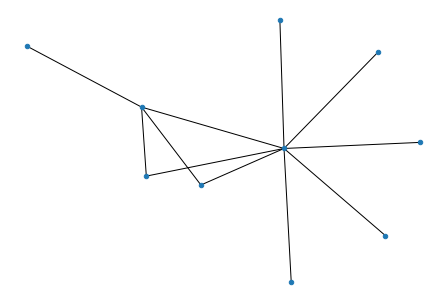

In [19]:
nx.draw(nextG, node_size=20)

In [20]:

def order(theta):
    z = sum(np.exp(theta*1j))/len(theta)
#    print(np.absolute(z), np.angle(z))
    return np.absolute(z), np.angle(z)

In [21]:
ordr = []
angle = []


the_ta = nextG.nodes[i]['theta']
x,y = order(the_ta)

#ordr = np.array(ordr)
#print(np.shape(ordr))
#abs_ord = np.zeros(step)
#print(abs_ord)

#ordr = ordr.flatten()
#for i in range(len(ordr)):
#    abs_ord = ordr[i][0]
#abs_ord = ordr1[0:int(step/2):1]
#angle = ordr1[int(step/2)+1:step:1]
print(x)
#print(angle)
plt.plot(x)
plt.plot(y)

KeyError: 999

In [ ]:
orpar = 0
img = 0 + 1j
print((nextG.nodes[node]['theta']).shape)
for node in nextG.nodes():
    orpar += cmath.exp(img*(nextG.nodes[node]['theta'][node]))
    print(nextG.nodes[node]['theta'])

orpar = orpar/N


print(orpar)

In [ ]:
#average phase
avg_phs = 0
for i in nextG.nodes():
  avg_phs += nextG.nodes[node]['theta'][i]
avg_phs = avg_phs/N
print(avg_phs)
avg_phs_ = cmath.exp(img*avg_phs)
print(avg_phs_)

In [ ]:
R = (orpar * np.conj(avg_phs_))/(avg_phs_ * np.conj(avg_phs_))
print(R, type(orpar))

In [ ]:
R = (orpar) /(avg_phs_ )
print(R, type(orpar))

In [ ]:
print(nextG.nodes[node]['theta'][0])

In [ ]:
R = (orpar * np.conj(avg_phs_))
print(R)